In [4]:
import numpy as np
import pandas as pd
from xgboost import XGBRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import mean_squared_error

df = pd.read_csv('schooldata.csv')
df = df.drop('NCESID', axis=1)
df = df.drop('YRDATA', axis=1)
df = df.drop('Fall_membership', axis=1)

In [5]:
rladf = df.drop('ALL_MTH00pctprof',axis=1)
rladf = rladf.dropna()

In [6]:
rladf['STATE'] = rladf['STATE'].astype(str)
rladf_encoded = pd.get_dummies(rladf, columns=['STATE'])

In [ ]:
#train interpretation rla model

X = rladf.drop('ALL_RLA00pctprof',axis=1)
X["STATE"] = X["STATE"].astype(int)
Y = rladf['ALL_RLA00pctprof']

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=1)
gsc = GridSearchCV(
            estimator=XGBRegressor(),
            param_grid={"learning_rate":(0.05, 0.10, 0.15,0.25,0.6),
                        "max_depth": [4, 5, 6, 8,10],
                        "min_child_weight": [ 1, 3, 5, 7],
                        "gamma":[ 0.0, 0.1, 0.2],
                        "colsample_bytree":[ 0.3,0.4,0.5,0.7],},
             cv = 2, scoring='neg_mean_squared_error', verbose=2, n_jobs=7)
grid_result = gsc.fit(X_train, y_train)

In [8]:
import pickle as pk
#pk.dump(grid_result.best_params_, open(f'rla_best_params.pkl', 'wb'))
rla_best_params = pk.load(open('rla_best_params.pkl', 'rb'))
rla_best_params["n_estimators"] = 5000
rla_best_params["n_jobs"] = 7
rla_best_params

{'colsample_bytree': 0.7,
 'gamma': 0.1,
 'learning_rate': 0.1,
 'max_depth': 10,
 'min_child_weight': 5,
 'n_estimators': 5000,
 'n_jobs': 7}

In [9]:
from IPython.display import clear_output
#rla interpretation model

X = rladf.drop('ALL_RLA00pctprof',axis=1)
X["STATE"] = X["STATE"].astype(int)
Y = rladf['ALL_RLA00pctprof']

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=1)

X_train, X_val, y_train, y_val  = train_test_split(X_train, y_train, test_size=0.25, random_state=1)

clear_output(wait=True)

xgb = XGBRegressor(**rla_best_params)
rla_model = xgb.fit(X_train, y_train,
            eval_set = [(X_train, y_train),
                      (X_val, y_val)],verbose=100)

xgb_test_predict = rla_model.predict(X_test)
pk.dump(rla_model, open(f'xgboost_rla_model.pkl', 'wb'))

[0]	validation_0-rmse:57.89842	validation_1-rmse:57.94339
[100]	validation_0-rmse:7.24729	validation_1-rmse:11.60546
[200]	validation_0-rmse:5.45492	validation_1-rmse:11.31468
[300]	validation_0-rmse:4.39065	validation_1-rmse:11.21598
[400]	validation_0-rmse:3.62428	validation_1-rmse:11.15312
[500]	validation_0-rmse:2.98659	validation_1-rmse:11.11357
[600]	validation_0-rmse:2.46838	validation_1-rmse:11.08864
[700]	validation_0-rmse:2.10810	validation_1-rmse:11.07327
[800]	validation_0-rmse:1.77880	validation_1-rmse:11.06139
[900]	validation_0-rmse:1.49633	validation_1-rmse:11.05054
[1000]	validation_0-rmse:1.26271	validation_1-rmse:11.04119
[1100]	validation_0-rmse:1.07597	validation_1-rmse:11.03252
[1200]	validation_0-rmse:0.92182	validation_1-rmse:11.02706
[1300]	validation_0-rmse:0.80225	validation_1-rmse:11.02323
[1400]	validation_0-rmse:0.68772	validation_1-rmse:11.01999
[1500]	validation_0-rmse:0.60303	validation_1-rmse:11.01666
[1600]	validation_0-rmse:0.52089	validation_1-rmse:

In [10]:
print("rla model training results")
print(f"root mean squared error: {(mean_squared_error(y_test, xgb_test_predict))**0.5}")

rla model training results
root mean squared error: 10.929000396271968


In [12]:
from IPython.display import clear_output

#train enconded_math model

X = rladf_encoded.drop('ALL_RLA00pctprof',axis=1)
Y = rladf_encoded['ALL_RLA00pctprof']

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=200)

X_train, X_val, y_train, y_val  = train_test_split(X_train, y_train, test_size=0.25, random_state=200)

clear_output(wait=True)

e_xgb = XGBRegressor(**rla_best_params)
e_rla_model = xgb.fit(X_train, y_train,
            eval_set = [(X_train, y_train),
                      (X_val, y_val)],verbose=100)
e_xgb_test_predict = e_rla_model.predict(X_test)
pk.dump(e_rla_model, open(f'xgboost_e_rla_model.pkl', 'wb'))

[0]	validation_0-rmse:57.99173	validation_1-rmse:58.02087
[100]	validation_0-rmse:8.60130	validation_1-rmse:11.63055
[200]	validation_0-rmse:6.70179	validation_1-rmse:11.22292
[300]	validation_0-rmse:5.33140	validation_1-rmse:11.03776
[400]	validation_0-rmse:4.33442	validation_1-rmse:10.93962
[500]	validation_0-rmse:3.63342	validation_1-rmse:10.88479
[600]	validation_0-rmse:3.06870	validation_1-rmse:10.85025
[700]	validation_0-rmse:2.60482	validation_1-rmse:10.82481
[800]	validation_0-rmse:2.19911	validation_1-rmse:10.80492
[900]	validation_0-rmse:1.85973	validation_1-rmse:10.78872
[1000]	validation_0-rmse:1.58644	validation_1-rmse:10.77730
[1100]	validation_0-rmse:1.38319	validation_1-rmse:10.77147
[1200]	validation_0-rmse:1.19625	validation_1-rmse:10.76509
[1300]	validation_0-rmse:1.03374	validation_1-rmse:10.75824
[1400]	validation_0-rmse:0.88668	validation_1-rmse:10.75149
[1500]	validation_0-rmse:0.76913	validation_1-rmse:10.74818
[1600]	validation_0-rmse:0.67902	validation_1-rmse:

In [13]:
print("encoded rla model training results")
print(f"root mean squared error: {(mean_squared_error(y_test, e_xgb_test_predict))**0.5}")

encoded rla model training results
root mean squared error: 10.596446098926938


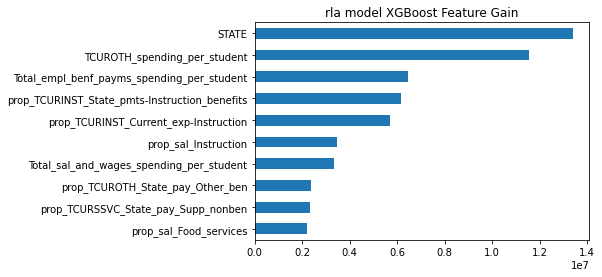

In [14]:
model = pk.load(open('xgboost_rla_model.pkl', 'rb'))
x = pd.Series(model.get_booster().get_score(importance_type= 'total_gain')
         ).sort_values()
x[-10:].plot(kind='barh',title="rla model XGBoost Feature Gain")

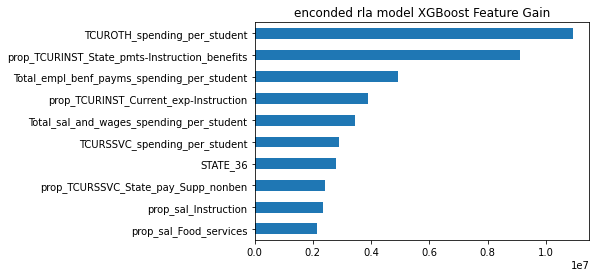

In [15]:
model = pk.load(open('xgboost_e_rla_model.pkl', 'rb'))
x = pd.Series(model.get_booster().get_score(importance_type= 'total_gain')
         ).sort_values()
x[-10:].plot(kind='barh',title="enconded rla model XGBoost Feature Gain")